In [117]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
# Read data set (csv format) using Pandas
df=pd.read_csv('Data\\stroke.csv')
# Get a feel about data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [118]:
#Checking the number of rows and columns
df.shape
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [119]:
cl = list(df.columns)
for i in cl:
    print('No of unique values in column', i , ' is ', df[i].nunique())

No of unique values in column id  is  5110
No of unique values in column gender  is  3
No of unique values in column age  is  104
No of unique values in column hypertension  is  2
No of unique values in column heart_disease  is  2
No of unique values in column ever_married  is  2
No of unique values in column work_type  is  5
No of unique values in column Residence_type  is  2
No of unique values in column avg_glucose_level  is  3979
No of unique values in column bmi  is  418
No of unique values in column smoking_status  is  4
No of unique values in column stroke  is  2


Look for unwanted columns that wont help for our analysis
 BY Initial glance , we can understand that columns id won't play any role, just a unique number, hence we can drop **id**

In [120]:
# drop id column 
df_wt_id = df.drop('id', axis=1)# axis 1 is column, 0 is row
df_wt_id

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [121]:
df_wt_id.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Inference
# The percentile is the value below which a certain percent of numerical data falls
# 25% patient have age less than 25; 50% patient have age less than 45; 75 % patient have age less than 61 years
1. Patient has age range <1 to 82, average age is 43
2. gender, ever_married, work_type, Residence_type, smoking_status can be labelled to convert it to numerical data

# Data Pre Processing
# The process of converting data from the domain in a form that is more suitable for data modelling 
# Step 1: Data cleaning
# Step 2: Feature Selection
# Step 3: Data transforms
# Step 4: Feature Engineering
# Step 5: Dimensionality Reduction

1 Data Cleaning
What to find: Find NULL values
How to find: 
How to treat

In [122]:
df_wt_id.isnull().sum().to_frame().T

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,0,0,0,0,0,0,201,0,0


In [123]:
#How to treat ? Dropping 

In [124]:
df_drop= df_wt_id.dropna() # Drop all rows where we have null values , if you want to drop columns use dropna(axis='columns')

In [125]:
df_drop

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [126]:
df_drop.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [127]:
df_drop.shape

(4909, 11)

In [128]:
#imputation : Whether to remove missing values or replace the values with some statistical value (mean, mode, median)

In [129]:
bmi_mean = round(df_wt_id['bmi'].mean(), 2)
# Use original data set df_wt_id where we had NUll values to calculate statistical values, round value upto 2 decimal values
bmi_mean

28.89

In [130]:
bmi_median = df_wt_id['bmi'].median()
# Use original data set df_wt_id where we had NUll values to calculate statistical values, calcualte median
bmi_median

28.1

In [131]:
df_imputate = df_wt_id.fillna(bmi_mean, axis=1) # Replace all null values with mean value along which axis rows 0, columns 1
df_imputate

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.2,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [132]:
# What to find : Duplicate Values
# How to find : 
##** Don't consider id to find duplicates. Since it is unique 
df_imputate.duplicated().sum() # No duplicates found
# How to find duplicates df_imputate[df_imputate.duplicated()]

0

<Axes: xlabel='age'>

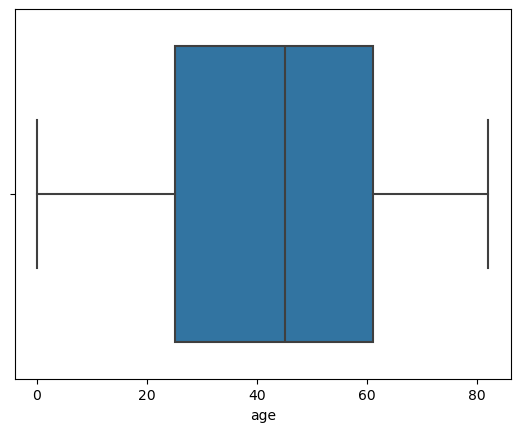

In [133]:
df_imputate.drop_duplicates()
sns.boxplot(data=df_imputate, x ='age')# Box and whisker plot is used to identify outliers

<Axes: xlabel='bmi'>

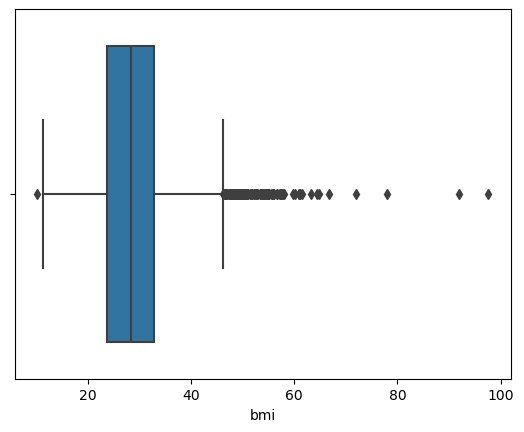

In [134]:
sns.boxplot(data=df_imputate, x ='bmi')


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

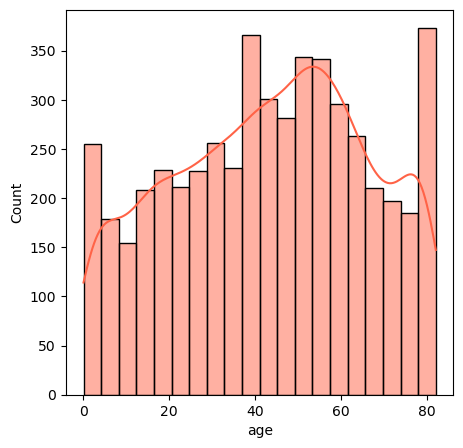

In [135]:
pyplot.figure(figsize=(5,5))
sns.histplot(data=df_imputate, x ='age', color='tomato', kde=True)
# Kernel density estimation

In [136]:
df_imputate['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

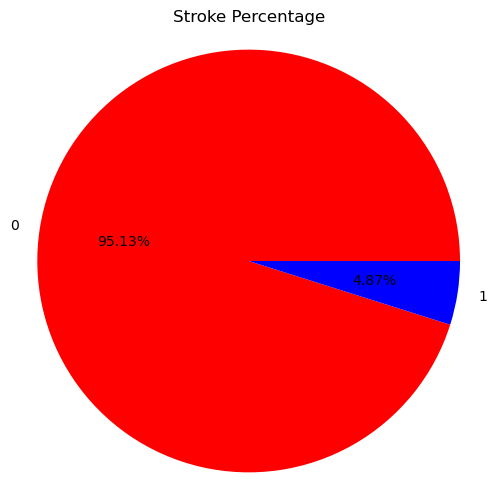

In [137]:
labels = ['0', '1']
sizes = [4861, 249]
colors = ['red', 'blue']


pyplot.figure(figsize=(6, 6))
pyplot.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')
pyplot.title('Stroke Percentage')
pyplot.axis('equal')


pyplot.show()

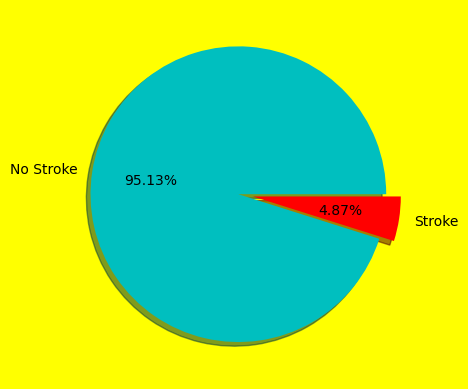

In [138]:
df_grp = pd.DataFrame(df_imputate.groupby('stroke')['stroke'].count())
colors=['c','r']
lables=['No Stroke','Stroke']
pyplot.pie(df_grp['stroke'], labels=['No Stroke','Stroke'], autopct='%.2f%%', colors=colors,radius=1.0, shadow=True, explode=[0, 0.1])
fig = pyplot.gcf()
fig.set_facecolor('yellow')

In [139]:
# Create plots for univariate, bivariate, mulitvariate. give inference .
# EDA on 5 different data sets

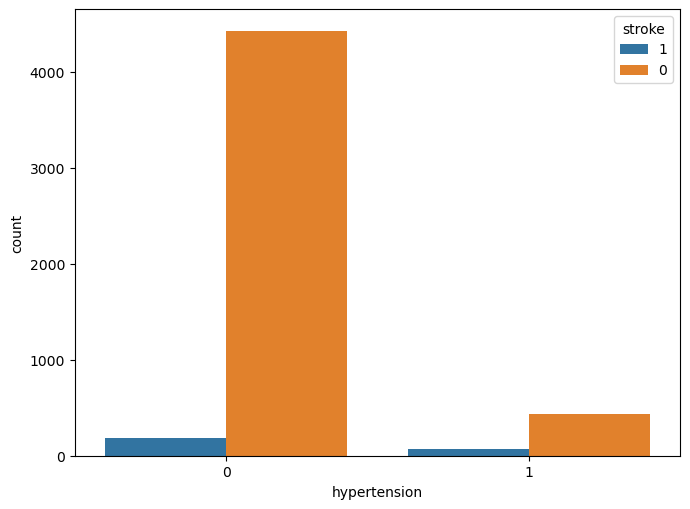

In [141]:
df_imputate['stroke'] = df_imputate['stroke'].astype(str)# convert to str
obj_list=['hypertension']
pyplot.figure(figsize=(7,30))
for i in range(len(obj_list)):
    pyplot.subplot(6,1,i+1)
    sns.countplot(data =df_imputate, x=obj_list[i], hue='stroke')
pyplot.tight_layout()

In [142]:
df_imputate['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [149]:
#type(df_imputate['work_type'].to_frame())
df_imputate['work_type'].to_frame().plot(kind='pie', y='Work type count')

KeyError: 'Work type count'

In [150]:
df_imputate['age'].mean()

43.226614481409015

In [166]:
df_imputate['hypertension' == '1'].sum()

KeyError: False

In [172]:
df_imputate[df_imputate['hypertension']==1]['stroke'].count()

5110